<a href="https://colab.research.google.com/github/Rohithkr02/rohithkr2002projects/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
df=pd.read_csv('/content/dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [53]:
df.shape

(1697, 2)

Here has 1697 rows and 2 columns.

In [54]:
df.dtypes

input     float64
output    float64
dtype: object

In [55]:
df.isna().sum()

input     1
output    1
dtype: int64

In [56]:
df['input']=df['input'].fillna(df['input'].mean())
df['output']=df['output'].fillna(df['output'].mean())

outlier detection

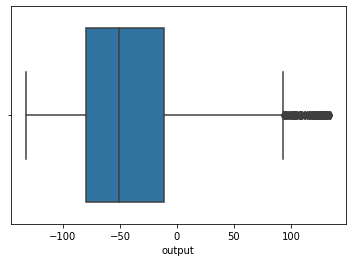

In [57]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.boxplot('output',data=df)

In [58]:
import numpy as np
q1=df.output.quantile(.25)
q3=df.output.quantile(.75)
iqr=q3-q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df['output']=np.where(df['output']>=upper_limit,upper_limit,np.where(df['output']<=lower_limit,lower_limit,df['output']))


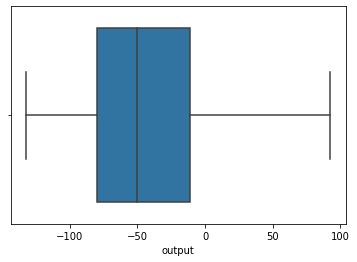

In [59]:
sns.boxplot('output',data=df)

In [60]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new=sc.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=1)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
lg=LinearRegression()
dt=DecisionTreeRegressor()
rd=RandomForestRegressor()
lst=[lg,dt,rd]
for i in lst:
  print('******')
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(r2_score(y_test,y_pred)*100)
  print(mean_absolute_error(y_test,y_pred))

******
LinearRegression()
22.34960616135143
39.901128285780274
******
DecisionTreeRegressor()
67.00391411675508
15.167896092885373
******
RandomForestRegressor()
69.10737657511659
17.50618181984515


Hyperparameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV
clf1=RandomForestRegressor()
params={'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300]}
cls=GridSearchCV(clf1,params,cv=15,scoring='r2')
cls.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [65]:
print(cls.best_params_)

{'max_features': 'log2', 'n_estimators': 300}


In [69]:
clf3=RandomForestRegressor(n_estimators=300,max_features='log2',random_state=3)
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
print(r2_score(y_test,y_pred3))

0.6909116803505917


Here best model is random forest regressor.I have gotten 69% percentage r2 score .so best model is random forest regressor